In [22]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*__version__.*")

# Example Sentences with Intentional Spelling Errors, Digits, and Special Characters

## In this section, we work with three example sentences that contain common types of errors such as:

1. **Spelling Errors**: Deliberate misspellings of words to simulate common real-world typing errors.
2. **Digits**: Inclusion of numbers within words or sentences.
3. **Special Characters**: The use of punctuation marks or symbols that do not belong in the context of natural language.


In [1]:
# Import necessary libraries
import pandas as pd
import re
import unicodedata
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from textblob import TextBlob  # For spelling correction

# Download NLTK data (if not already installed)
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('stopwords')

# Example sentences with intentional spelling errors, digits, and special characters
sentences = [
    "Mach1ne learninğ is a subs3t of artificial intell!gençe that enabless systems to learn from daata.",
    "Artificiaal intelligence include fieldş lyk machinne learning, natural language processing, & robotics 2.",
    "Deep learn!ng is a specia1ized form of mach!ne learning that uses neur@l networks.",
    "woow!, I won this match by 10 points. Which team won last year.",
    "Why could'nt u stop him from scoring more. I would've stopped him, if I was u.I think he paid you for this, you cheeter."
]

# Text Preprocessing

In [2]:
# Step 1: Unicode Normalization and Basic Text Cleaning (to remove special characters and digits)
print("Step 1: Unicode Normalization and Basic Text Cleaning (remove special characters and digits)")

# Unicode normalization and case folding
normalized_sentences = [
    unicodedata.normalize('NFKD', sentence).encode('ascii', 'ignore').decode('utf-8').lower()
    for sentence in sentences
]

# Remove punctuation and digits
cleaned_sentences = [re.sub(r'[^\w\s]', '', sentence) for sentence in normalized_sentences]
cleaned_sentences = [re.sub(r'\d+', '', sentence) for sentence in cleaned_sentences]

for i, sentence in enumerate(cleaned_sentences, 1):
    print(f"Sentence {i}: {sentence}")
print('\n')

# Step 2: Spelling Correction
print("Step 2: Spelling Correction")
corrected_sentences = [str(TextBlob(sentence).correct()) for sentence in cleaned_sentences]
for i, sentence in enumerate(corrected_sentences, 1):
    print(f"Sentence {i}: {sentence}")
print('\n')

# Step 3: Tokenization
print("Step 3: Tokenization")
tokenized_sentences = [word_tokenize(sentence) for sentence in corrected_sentences]
for i, sentence in enumerate(tokenized_sentences, 1):
    print(f"Sentence {i}: {sentence}")
print('\n')

# Step 4: Remove Stop Words
print("Step 4: Remove Stop Words")
stop_words = set(stopwords.words('english'))
tokens_no_stopwords = [[word for word in sentence if word not in stop_words] for sentence in tokenized_sentences]
for i, sentence in enumerate(tokens_no_stopwords, 1):
    print(f"Sentence {i}: {sentence}")
print('\n')


Step 1: Unicode Normalization and Basic Text Cleaning (remove special characters and digits)
Sentence 1: machne learning is a subst of artificial intellgence that enabless systems to learn from daata
Sentence 2: artificiaal intelligence include fields lyk machinne learning natural language processing  robotics 
Sentence 3: deep learnng is a speciaized form of machne learning that uses neurl networks
Sentence 4: woow i won this match by  points which team won last year
Sentence 5: why couldnt u stop him from scoring more i wouldve stopped him if i was ui think he paid you for this you cheeter


Step 2: Spelling Correction
Sentence 1: machine learning is a must of artificial intelligence that enables systems to learn from data
Sentence 2: artificial intelligence include fields ly machine learning natural language processing  robotics 
Sentence 3: deep learning is a specialized form of machine learning that uses neuro network
Sentence 4: wood i won this match by  points which team won las

In [3]:
import spacy
nlp = spacy.load("en_core_web_sm")

lemmatized_sentences = [[token.lemma_ for token in nlp(" ".join(sentence))] for sentence in tokens_no_stopwords]

# Join lemmatized words into sentences
lemmatized_sentences = [" ".join(words) for words in lemmatized_sentences]
for i, sentence in enumerate(lemmatized_sentences, 1):
    print(f"Sentence {i}: {sentence}")
print('\n')

print("Spelling Correction")
preprocessed_sentences = [str(TextBlob(sentence).correct()) for sentence in lemmatized_sentences]
for i, sentence in enumerate(preprocessed_sentences, 1):
    print(f"Sentence {i}: {sentence}")
print('\n')

Sentence 1: machine learning must artificial intelligence enable system learn datum
Sentence 2: artificial intelligence include field ly machine learn natural language processing robotic
Sentence 3: deep learn specialized form machine learning use neuro network
Sentence 4: wood match point team last year
Sentence 5: u stop scoring would stop think pay chester


Spelling Correction
Sentence 1: machine learning must artificial intelligence enable system learn date
Sentence 2: artificial intelligence include field ly machine learn natural language processing robotic
Sentence 3: deep learn specialized form machine learning use neuro network
Sentence 4: wood match point team last year
Sentence 5: u stop scoring would stop think pay chester




In [4]:
# Step 6: Stemming
print("Step 6: Stemming")
stemmer = PorterStemmer()
stemmed_sentences = [[stemmer.stem(word) for word in sentence] for sentence in tokens_no_stopwords]

# Join stemmed words into sentences
stemmed_sentences = [" ".join(words) for words in stemmed_sentences]
for i, sentence in enumerate(stemmed_sentences, 1):
    print(f"Sentence {i}: {sentence}")
print('\n')

print("Spelling Correction")
preprocessed_sentences = [str(TextBlob(sentence).correct()) for sentence in stemmed_sentences]
for i, sentence in enumerate(preprocessed_sentences, 1):
    print(f"Sentence {i}: {sentence}")
print('\n')

Step 6: Stemming
Sentence 1: machin learn must artifici intellig enabl system learn data
Sentence 2: artifici intellig includ field ly machin learn natur languag process robot
Sentence 3: deep learn special form machin learn use neuro network
Sentence 4: wood match point team last year
Sentence 5: u stop score would stop think paid chester


Spelling Correction
Sentence 1: machine learn must artifice intellig enable system learn data
Sentence 2: artifice intellig include field ly machine learn nature language process root
Sentence 3: deep learn special form machine learn use neuro network
Sentence 4: wood match point team last year
Sentence 5: u stop score would stop think paid chester





# Explanation:

1. **Lemmatization**: Converts words to their base form (`e.g., "paid" → "pay"`). It's context-sensitive and retains the meaning of the word, making it ideal for preserving semantics.  
2. **Spelling Correction**: Fixes typos (`e.g., "runnning" → "running"`). Should come after lemmatization to ensure that corrected words are in their base form.
3. **Stemming**: Reduces words to their root form (`e.g., "running" → "run"`). It's faster but can lead to non-dictionary forms that may lose meaning.

### Recommended Order:
**Lemmatization → Spelling Correction → Stemming**

- **Lemmatization first** preserves the meaning of words.
- **Spelling correction second** ensures typos are fixed in their base form.
- **Stemming last** generalizes the words further but could distort meaning.

This sequence is best for maintaining meaning while cleaning the text effectively.

In [5]:
import spacy
from textblob import TextBlob
from nltk.stem import PorterStemmer

# Load SpaCy model
nlp = spacy.load("en_core_web_sm")

# Step 1: Lemmatization
print("Step 1: Lemmatization")
lemmatized_sentences = [
    [token.lemma_ for token in nlp(" ".join(sentence))]
    for sentence in tokens_no_stopwords
]

# Join lemmatized words into sentences
lemmatized_sentences = [" ".join(words) for words in lemmatized_sentences]
for i, sentence in enumerate(lemmatized_sentences, 1):
    print(f"Sentence {i}: {sentence}")
print('\n')

# Step 2: Spelling Correction
print("Step 2: Spelling Correction")
corrected_sentences = [str(TextBlob(sentence).correct()) for sentence in lemmatized_sentences]
for i, sentence in enumerate(corrected_sentences, 1):
    print(f"Sentence {i}: {sentence}")
print('\n')

# Step 3: Stemming
print("Step 3: Stemming")
stemmer = PorterStemmer()
stemmed_sentences = [
    [stemmer.stem(word) for word in sentence.split()]
    for sentence in corrected_sentences
]

# Join stemmed words into sentences
stemmed_sentences = [" ".join(words) for words in stemmed_sentences]
for i, sentence in enumerate(stemmed_sentences, 1):
    print(f"Sentence {i}: {sentence}")
print('\n')


Step 1: Lemmatization
Sentence 1: machine learning must artificial intelligence enable system learn datum
Sentence 2: artificial intelligence include field ly machine learn natural language processing robotic
Sentence 3: deep learn specialized form machine learning use neuro network
Sentence 4: wood match point team last year
Sentence 5: u stop scoring would stop think pay chester


Step 2: Spelling Correction
Sentence 1: machine learning must artificial intelligence enable system learn date
Sentence 2: artificial intelligence include field ly machine learn natural language processing robotic
Sentence 3: deep learn specialized form machine learning use neuro network
Sentence 4: wood match point team last year
Sentence 5: u stop scoring would stop think pay chester


Step 3: Stemming
Sentence 1: machin learn must artifici intellig enabl system learn date
Sentence 2: artifici intellig includ field ly machin learn natur languag process robot
Sentence 3: deep learn special form machin lear

# Preprocessed Sentences 

In [6]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
import re
from sklearn.preprocessing import LabelEncoder


# Example sentences after preprocessing (tokenization, normalization, spelling correction, etc.)
# For simplicity, let's assume preprocessed sentences look like this
preprocessed_sentences = ["machin learn must artifici intellig enabl system learn date",
"artifici intellig includ field ly machin learn natur languag process robot",
"deep learn special form machin learn use neuro network"
]

# Display original sentences to students
print("Preprocessed Sentences:")
for i, sentence in enumerate(preprocessed_sentences, 1):
    print(f"Sentence {i}: {sentence}")
print("\n")

Preprocessed Sentences:
Sentence 1: machin learn must artifici intellig enabl system learn date
Sentence 2: artifici intellig includ field ly machin learn natur languag process robot
Sentence 3: deep learn special form machin learn use neuro network




## Bag of Words (BoW) 
**BoW is a simple and widely used method for text representation in Natural Language Processing (NLP). It represents text data as a "bag" (or collection) of words, disregarding grammar and word order, but keeping track of the frequency of each word.**

**Key Characteristics:**
1. `Text Representation:`
- BoW turns text into a set of features, where each feature corresponds to a unique word in the entire corpus (the collection of documents or sentences).
The result is a vector where each position corresponds to the frequency of a word in the text.
2. `Assumptions:`
- *Order Ignorance*: The order of words in a sentence or document does not matter. The model only cares about which words appear and how frequently.
- *Features*: Words are treated as independent features, assuming they are independent of each other (which is often a simplification, but useful for many NLP tasks).
3. `Vocabulary Creation:`
- First, all unique words (after preprocessing like removing stop words, stemming, etc.) across the entire corpus are collected.
- This forms the vocabulary for the BoW model.
4. `Feature Vector:`
- Each document (or sentence) is represented as a vector, with each element corresponding to the frequency of a word from the vocabulary.
- If the word exists in the document, the corresponding vector element is set to the frequency of that word; otherwise, it’s set to 0.

## Bag of Representation is different for these examples

1.  `Example 1:`

- **preprocessed_sentences** =
    - "machin learn must artifici intellig enabl system learn date",
    - "artifici intellig includ field ly machin learn natur languag process robot",
    - "deep learn special form machin learn use neuro network"


2.  `Example 2:`
- **preprocessed_sentences2** =
    - "machine learning machine machine subset artificial artificial artificial artificial intelligence enables systems learn data",
    - "artificial artificial intelligence includes fields like machine learning natural language processing robotics",
    - "deep learning specialized form machine learning uses neural networks"

# Unigram Representation

In [7]:
# Step 1: Unigram Bag of Words
print("Step 1: Unigram Bag of Words (BoW)")
# Initialize vectorizer for unigrams
unigram_vectorizer = CountVectorizer(ngram_range=(1, 1))  # Only unigrams

# Transform sentences into unigram BoW
unigram_bow_matrix = unigram_vectorizer.fit_transform(preprocessed_sentences)

# Create a DataFrame to display unigram BoW
unigram_bow_df = pd.DataFrame(unigram_bow_matrix.toarray(), columns=unigram_vectorizer.get_feature_names_out())
# print("Unigram BoW:")
# print(unigram_bow_df)
# print("\n")

unigram_bow_df

Step 1: Unigram Bag of Words (BoW)


,artifici,date,deep,enabl,field,form,includ,intellig,languag,learn,...,machin,must,natur,network,neuro,process,robot,special,system,use
0,1,1,0,1,0,0,0,1,0,2,...,1,1,0,0,0,0,0,0,1,0
1,1,0,0,0,1,0,1,1,1,1,...,1,0,1,0,0,1,1,0,0,0
2,0,0,1,0,0,1,0,0,0,2,...,1,0,0,1,1,0,0,1,0,1


## `Example 2:`

- **preprocessed_sentences2** =
    - "machine learning machine machine subset artificial artificial artificial artificial intelligence enables systems learn data",
    - "artificial artificial intelligence includes fields like machine learning natural language processing robotics",
    - "deep learning specialized form machine learning uses neural networks"


In [9]:
preprocessed_sentences2 = [
    "machine learning machine machine subset artificial artificial artificial artificial intelligence enables systems learn data",
    "artificial artificial intelligence includes fields like machine learning natural language processing robotics",
    "deep learning specialized form machine learning uses neural networks"
]

In [10]:
# Step 1: Unigram Bag of Words
print("Step 1: Unigram Bag of Words (BoW)")
# Initialize vectorizer for unigrams
unigram_vectorizer = CountVectorizer(ngram_range=(1, 1))  # Only unigrams

# Transform sentences into unigram BoW
unigram_bow_matrix = unigram_vectorizer.fit_transform(preprocessed_sentences2)

# Create a DataFrame to display unigram BoW
unigram_bow_df = pd.DataFrame(unigram_bow_matrix.toarray(), columns=unigram_vectorizer.get_feature_names_out())
# print("Unigram BoW:")
# print(unigram_bow_df)
# print("\n")

unigram_bow_df

Step 1: Unigram Bag of Words (BoW)


,artificial,data,deep,enables,fields,form,includes,intelligence,language,learn,...,machine,natural,networks,neural,processing,robotics,specialized,subset,systems,uses
0,4,1,0,1,0,0,0,1,0,1,...,3,0,0,0,0,0,0,1,1,0
1,2,0,0,0,1,0,1,1,1,0,...,1,1,0,0,1,1,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,1,0,1,1,0,0,1,0,0,1


# Bigram Representation

In [11]:
# Step 2: Bigram Bag of Words
print("Step 2: Bigram Bag of Words (BoW)")
# Initialize vectorizer for bigrams
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2))  # Only bigrams

# Transform sentences into bigram BoW
bigram_bow_matrix = bigram_vectorizer.fit_transform(preprocessed_sentences)

# Create a DataFrame to display bigram BoW
bigram_bow_df = pd.DataFrame(bigram_bow_matrix.toarray(), columns=bigram_vectorizer.get_feature_names_out())
# print("Bigram BoW:")
# print(bigram_bow_df)
# print("\n")

bigram_bow_df

Step 2: Bigram Bag of Words (BoW)


,artifici intellig,deep learn,enabl system,field ly,form machin,includ field,intellig enabl,intellig includ,languag process,learn date,...,learn use,ly machin,machin learn,must artifici,natur languag,neuro network,process robot,special form,system learn,use neuro
0,1,0,1,0,0,0,1,0,0,1,...,0,0,1,1,0,0,0,0,1,0
1,1,0,0,1,0,1,0,1,1,0,...,0,1,1,0,1,0,1,0,0,0
2,0,1,0,0,1,0,0,0,0,0,...,1,0,1,0,0,1,0,1,0,1


# Trigram Representation

In [12]:
# Step 3: Trigram Bag of Words
print("Step 3: Trigram Bag of Words (BoW)")
# Initialize vectorizer for trigrams
trigram_vectorizer = CountVectorizer(ngram_range=(3, 3))  # Only trigrams

# Transform sentences into trigram BoW
trigram_bow_matrix = trigram_vectorizer.fit_transform(preprocessed_sentences)

# Create a DataFrame to display trigram BoW
trigram_bow_df = pd.DataFrame(trigram_bow_matrix.toarray(), columns=trigram_vectorizer.get_feature_names_out())
# print("Trigram BoW:")
# print(trigram_bow_df)
# print("\n")

trigram_bow_df

Step 3: Trigram Bag of Words (BoW)


,artifici intellig enabl,artifici intellig includ,deep learn special,enabl system learn,field ly machin,form machin learn,includ field ly,intellig enabl system,intellig includ field,languag process robot,...,learn use neuro,ly machin learn,machin learn must,machin learn natur,machin learn use,must artifici intellig,natur languag process,special form machin,system learn date,use neuro network
0,1,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
1,0,1,0,0,1,0,1,0,1,1,...,0,1,0,1,0,0,1,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,1,0,1


## POS Tagging (Part-of-Speech Tagging):

- **Definition**: POS tagging is the process of assigning each word in a sentence a specific grammatical category (e.g., `noun, verb, adjective`) based on its role in the sentence.
- **Purpose**: It helps in understanding the structure and meaning of a sentence, aiding in tasks like syntactic parsing, machine translation, and information extraction.
- **Common Tags**: 
  - **NOUN**: Represents a person, place, thing, or idea.
  - **VERB**: Describes an action or state.
  - **ADJ**: Modifies or describes a noun.
  - **ADV**: Modifies or describes a verb, adjective, or another adverb.
  - **PROPN**: Refers to a specific name (proper noun).
  - **AUX**: Auxiliary verbs, helping verbs like `"is", "are", "have."`
- **Challenges**: Accuracy depends on spelling, context, and sentence structure. Misspellings or ambiguous words can lead to misclassifications.

In [13]:
# POS Tagging using spaCy
import spacy

# Load the small English model
nlp = spacy.load("en_core_web_sm")

# Perform POS tagging on each preprocessed sentence
pos_tagged_sentences = []

for sentence in preprocessed_sentences:
    doc = nlp(sentence)  # Process the sentence with spaCy
    pos_tags = [(token.text, token.pos_) for token in doc]  # Get word and its POS tag
    pos_tagged_sentences.append(pos_tags)

# Print the POS tagged sentences
for i, sentence in enumerate(pos_tagged_sentences, 1):
    print(f"Sentence {i} POS Tags: {sentence}")
    print("\n")


Sentence 1 POS Tags: [('machin', 'PROPN'), ('learn', 'NOUN'), ('must', 'AUX'), ('artifici', 'AUX'), ('intellig', 'VERB'), ('enabl', 'ADJ'), ('system', 'NOUN'), ('learn', 'VERB'), ('date', 'NOUN')]


Sentence 2 POS Tags: [('artifici', 'INTJ'), ('intellig', 'VERB'), ('includ', 'PROPN'), ('field', 'NOUN'), ('ly', 'X'), ('machin', 'PROPN'), ('learn', 'VERB'), ('natur', 'PROPN'), ('languag', 'PROPN'), ('process', 'NOUN'), ('robot', 'NOUN')]


Sentence 3 POS Tags: [('deep', 'ADV'), ('learn', 'VERB'), ('special', 'ADJ'), ('form', 'NOUN'), ('machin', 'NOUN'), ('learn', 'NOUN'), ('use', 'NOUN'), ('neuro', 'PROPN'), ('network', 'NOUN')]




## Sentence 1: POS Tags:  
`[('machin', 'PROPN'), ('learn', 'NOUN'), ('must', 'AUX'), ('artifici', 'AUX'), ('intellig', 'VERB'), ('enabl', 'ADJ'), ('system', 'NOUN'), ('learn', 'VERB'), ('date', 'NOUN')]`

- **machin** (`PROPN`): Proper noun. This is likely a misspelling of "machine," but spaCy assigns it a proper noun tag.
- **learn** (`NOUN`): Noun. The word "learn" is treated as a noun here, possibly referring to "learning."
- **must** (`AUX`): Auxiliary verb. This word helps form verb phrases or adds tense/modal meanings.
- **artifici** (`AUX`): Auxiliary verb, probably meant to be "artificial," but incorrectly tagged as an auxiliary verb.
- **intellig** (`VERB`): Verb. Likely meant to be "intelligence," but spaCy tagged it as a verb.
- **enabl** (`ADJ`): Adjective. Likely intended to be "enable," but is tagged as an adjective.
- **system** (`NOUN`): Noun. Refers to "system," correctly tagged as a noun.
- **learn** (`VERB`): Verb. A correct verb form, referring to the action of learning.
- **date** (`NOUN`): Noun. Refers to "date," correctly tagged as a noun.

## Sentence 2: POS Tags:  
`[('artifici', 'INTJ'), ('intellig', 'VERB'), ('includ', 'PROPN'), ('field', 'NOUN'), ('ly', 'X'), ('machin', 'PROPN'), ('learn', 'VERB'), ('natur', 'PROPN'), ('languag', 'PROPN'), ('process', 'NOUN'), ('robot', 'NOUN')]`

- **artifici** (`INTJ`): Interjection. This likely refers to "artificial," but spaCy tags it as an interjection (e.g., "Ah!").
- **intellig** (`VERB`): Verb. This is likely a misspelling of "intelligence," but spaCy tags it as a verb.
- **includ** (`PROPN`): Proper noun. Likely a misspelling of "include," but tagged as a proper noun.
- **field** (`NOUN`): Noun. Correctly tagged as a noun.
- **ly** (`X`): Unknown. This is an unrecognized token that doesn’t fit common POS categories.
- **machin** (`PROPN`): Proper noun. Likely a misspelling of "machine," treated as a proper noun.
- **learn** (`VERB`): Verb. Correctly tagged as a verb.
- **natur** (`PROPN`): Proper noun. Likely meant to be "nature," treated as a proper noun.
- **languag** (`PROPN`): Proper noun. Likely meant to be "language," but tagged as a proper noun.
- **process** (`NOUN`): Noun. Correctly tagged as a noun.
- **robot** (`NOUN`): Noun. Correctly tagged as a noun.

## Sentence 3: POS Tags:  
`[('deep', 'ADV'), ('learn', 'VERB'), ('special', 'ADJ'), ('form', 'NOUN'), ('machin', 'NOUN'), ('learn', 'NOUN'), ('use', 'NOUN'), ('neuro', 'PROPN'), ('network', 'NOUN')]`

- **deep** (`ADV`): Adverb. Correctly tagged as an adverb modifying "learn."
- **learn** (`VERB`): Verb. Correctly tagged as a verb, indicating the action.
- **special** (`ADJ`): Adjective. Describes the noun "form."
- **form** (`NOUN`): Noun. Refers to a type or category, correctly tagged as a noun.
- **machin** (`NOUN`): Noun. Likely meant to be "machine," tagged as a noun.
- **learn** (`NOUN`): Noun. Refers to "learning" as a concept.
- **use** (`NOUN`): Noun. Refers to "usage" or "application."
- **neuro** (`PROPN`): Proper noun. Refers to "neural" as a part of a proper noun (likely in the context of "neural networks").
- **network** (`NOUN`): Noun. Refers to "network," correctly tagged as a noun.

## Key Observations:
- **Errors due to misspelling**: Many words (e.g., "machin", "artifici") are tagged incorrectly because they are misspelled or incomplete, leading to improper POS assignments.
- **POS Tagging**: spaCy assigns grammatical categories like nouns, verbs, adjectives, etc., but the tagging is sensitive to spelling and context. Incorrectly spelled words can lead to misclassification.


-------------------------------------------------

# Feature Engineering 
## 1. One-Hot-Encoding

- **Definition**: One-hot encoding is a technique used to `convert categorical data` (i.e., non-numeric data) into a numerical format by representing each category as a vector. Each category is mapped to a `unique vector` where only one element is "hot" (set to 1) and all other elements are "cold" (set to 0).

## The One-Hot-Encoding is same for these two sentences

1.  `Example 1:`

- **preprocessed_sentences** =
    - "machin learn must artifici intellig enabl system learn date",
    - "artifici intellig includ field ly machin learn natur languag process robot",
    - "deep learn special form machin learn use neuro network"


2.  `Example 2:`
- **preprocessed_sentences2** =
    - "machine learning machine machine subset artificial artificial artificial artificial intelligence enables systems learn data",
    - "artificial artificial intelligence includes fields like machine learning natural language processing robotics",
    - "deep learning specialized form machine learning uses neural networks"




In [14]:
# Initialize the CountVectorizer to do one-hot encoding
vectorizer = CountVectorizer(binary=True)  # binary=True ensures one-hot encoding (0/1)

# Fit and transform the preprocessed sentences
one_hot_matrix = vectorizer.fit_transform(preprocessed_sentences)

# Convert to a DataFrame for better readability
one_hot_df = pd.DataFrame(one_hot_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Display the one-hot encoding for each sentence
print("One-Hot Encoding for Each Sentence:")
one_hot_df

One-Hot Encoding for Each Sentence:


,artifici,date,deep,enabl,field,form,includ,intellig,languag,learn,...,machin,must,natur,network,neuro,process,robot,special,system,use
0,1,1,0,1,0,0,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
1,1,0,0,0,1,0,1,1,1,1,...,1,0,1,0,0,1,1,0,0,0
2,0,0,1,0,0,1,0,0,0,1,...,1,0,0,1,1,0,0,1,0,1


## `Example 2`

**preprocessed_sentences2** =
- "machine learning machine machine subset artificial artificial artificial artificial intelligence enables systems learn data",
- "artificial artificial intelligence includes fields like machine learning natural language processing robotics",
- "deep learning specialized form machine learning uses neural networks"

In [15]:
# Initialize the CountVectorizer to do one-hot encoding
vectorizer = CountVectorizer(binary=True)  # binary=True ensures one-hot encoding (0/1)

# Fit and transform the preprocessed sentences
one_hot_matrix = vectorizer.fit_transform(preprocessed_sentences2)

# Convert to a DataFrame for better readability
one_hot_df = pd.DataFrame(one_hot_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Display the one-hot encoding for each sentence
print("One-Hot Encoding for Each Sentence:")
one_hot_df

One-Hot Encoding for Each Sentence:


,artificial,data,deep,enables,fields,form,includes,intelligence,language,learn,...,machine,natural,networks,neural,processing,robotics,specialized,subset,systems,uses
0,1,1,0,1,0,0,0,1,0,1,...,1,0,0,0,0,0,0,1,1,0
1,1,0,0,0,1,0,1,1,1,0,...,1,1,0,0,1,1,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,1,0,1,1,0,0,1,0,0,1


In [16]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer (this will generate the one-hot encoding)
vectorizer = CountVectorizer(binary=True)  # Use binary=True for one-hot encoding
X = vectorizer.fit_transform(preprocessed_sentences)

# Get the feature names (words)
words = vectorizer.get_feature_names_out()
words

# Convert the matrix to a pandas DataFrame for easier visualization
df = pd.DataFrame(X.toarray(), columns=words)

# Print one-hot encoding for each word
for word in words:
    print(f"{word}: {df[word].values.tolist()}")

artifici: [1, 1, 0]
date: [1, 0, 0]
deep: [0, 0, 1]
enabl: [1, 0, 0]
field: [0, 1, 0]
form: [0, 0, 1]
includ: [0, 1, 0]
intellig: [1, 1, 0]
languag: [0, 1, 0]
learn: [1, 1, 1]
ly: [0, 1, 0]
machin: [1, 1, 1]
must: [1, 0, 0]
natur: [0, 1, 0]
network: [0, 0, 1]
neuro: [0, 0, 1]
process: [0, 1, 0]
robot: [0, 1, 0]
special: [0, 0, 1]
system: [1, 0, 0]
use: [0, 0, 1]


# Term Frequency - Inverse Document Frequency

The vector value for `artificial: [1, 1, 0]` signifies that the text word artificial is present in document 1 and document 2 but not in document 3, so the document frequency (`DF(artificial) = 2`), Similarly for `data: [1, 0, 0]` , `DF(data) = 1` and so on..

1. `artificial: [1, 1, 0]`
2. `data: [1, 0, 0]`
3. `deep: [0, 0, 1]`
4. `enables: [1, 0, 0]`
5. `fields: [0, 1, 0]`
6. `form: [0, 0, 1]`
7. `includes: [0, 1, 0]`
8. `intelligence: [1, 1, 0]`
9. `language: [0, 1, 0]`
10. `learn: [1, 0, 0]`
11. `learning: [1, 1, 1]`
12. `like: [0, 1, 0]`
13. `machine: [1, 1, 1]`
14. `natural: [0, 1, 0]`
15. `networks: [0, 0, 1]`
16. `neural: [0, 0, 1]`
17. `processing: [0, 1, 0]`
18. `robotics: [0, 1, 0]`
19. `specialized: [0, 0, 1]`
20. `subset: [1, 0, 0]`
21. `systems: [1, 0, 0]`
22. `uses: [0, 0, 1]`

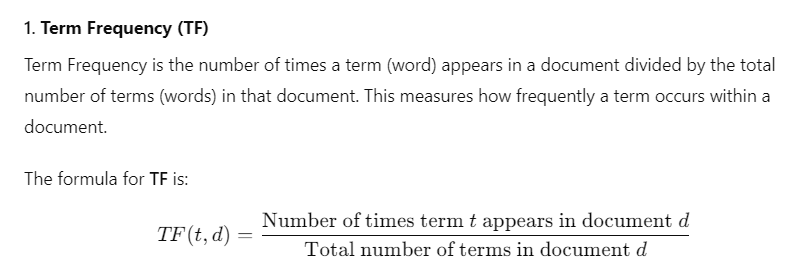

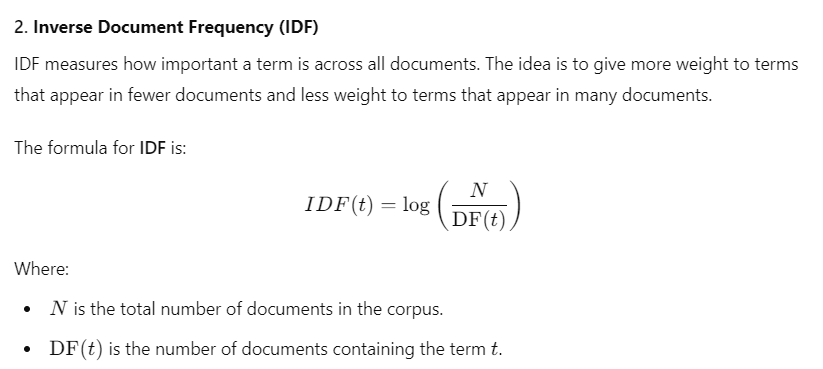

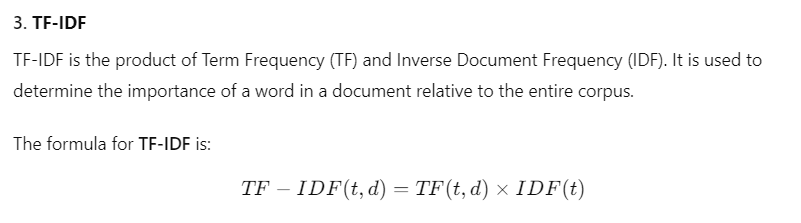

In [17]:
# Import necessary library
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the sentences to get the TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(preprocessed_sentences)

# Convert the matrix to a DataFrame for better visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Display the resulting DataFrame
tfidf_df


,artifici,date,deep,enabl,field,form,includ,intellig,languag,learn,...,machin,must,natur,network,neuro,process,robot,special,system,use
0,0.289508,0.380668,0.000000,0.380668,0.000000,0.000000,0.000000,0.289508,0.000000,0.449657,...,0.224828,0.380668,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.380668,0.000000
1,0.255584,0.000000,0.000000,0.000000,0.336062,0.000000,0.336062,0.255584,0.336062,0.198483,...,0.198483,0.000000,0.336062,0.000000,0.000000,0.336062,0.336062,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.359347,0.000000,0.000000,0.359347,0.000000,0.000000,0.000000,0.424472,...,0.212236,0.000000,0.000000,0.359347,0.359347,0.000000,0.000000,0.359347,0.000000,0.359347


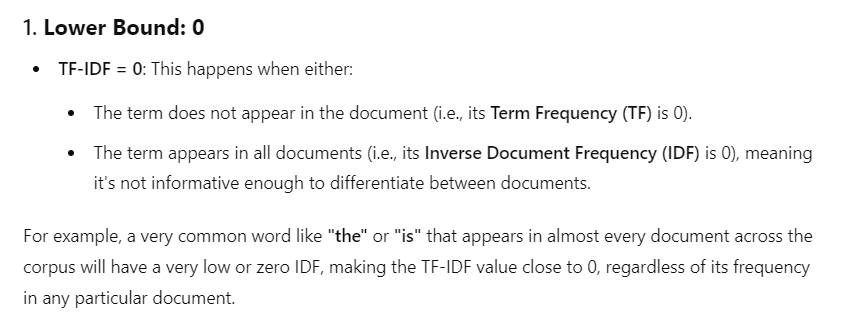

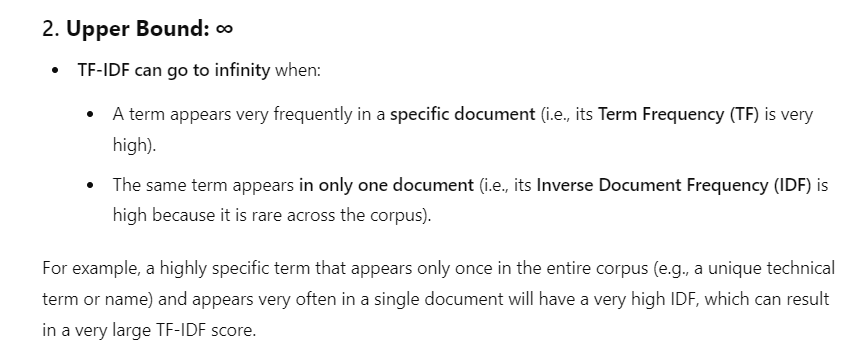

In [23]:
import session_info
session_info.show()